In [1]:
import matplotlib
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

In [64]:
test_df = pd.read_csv("dataset.csv")
test_df = test_df.replace('n.a.', np.NaN)
test_df = test_df.dropna()

In [18]:
#test yfinacne module
import yfinance as yf
ticker = yf.Ticker('TXN')
ticker.info

{'zip': '75243',
 'sector': 'Technology',
 'fullTimeEmployees': 30000,
 'longBusinessSummary': 'Texas Instruments Incorporated designs, manufactures, and sells semiconductors to electronics designers and manufacturers worldwide. It operates in two segments, Analog and Embedded Processing. The Analog segment offers power products to manage power requirements in various levels using battery management solutions, DC/DC switching regulators, AC/DC and isolated controllers and converters, power switches, linear regulators, voltage supervisors, voltage references, and lighting products. This segment also provides signal chain products that sense, condition, and measure signals to allow information to be transferred or converted for further processing and control for use in end markets, including amplifiers, data converters, interface products, motor drives, clocks, and sensing products.; and high volume products comprising integrated analog and standard products, which are primarily for sale

In [22]:
import scipy.cluster.hierarchy as sch

In [69]:
test_df

,Rank,Company,Symbol,Industry,ESG Score,Comp Rtg,RS Rtg,EPS Rtg,SMR Rtg,3-Yr EPS Growth Rate,ROE,Last Qtr Sales % Chg,Last Qtr EPS % Chg,Div Yld
0,1,Microsoft,MSFT,Computer Software-Desktop,76.30,99,84,94,A,25%,47%,21%,49%,0.7
1,2,Linde,LIN,Chemicals-Specialty,76.00,94,66,85,B,16,9,19,42,1.3
2,3,Accenture,ACN,Computer-Tech Services,75.95,97,84,81,A,9,33,21,26,1.0
3,4,J.B. Hunt,JBHT,Transportation-Trucking,74.14,89,68,81,B,6,21,36,41,0.7
4,5,Xylem,XYL,Machinery-Tools & Resources,73.89,87,87,79,B,-8,13,16,65,0.8
5,6,Texas Instruments,TXN,Electronics-Semiconductor Mfg,73.14,88,57,90,A,6,58,41,78,2.1
9,10,IHS Markit,INFO,Financial Services-Specialty,72.60,93,84,75,A,11,13,15,17,0.7
10,11,STMicroelectronics,STM,Electronics-Semiconductor Mfg,72.37,96,79,96,B,1,14,43,340,0.3
11,12,Nvidia,NVDA,Electronics-Semiconductor Fabless Mfg,72.19,99,93,97,A,27,43,68,89,0.1
13,14,Oracle,ORCL,Computer Software-Database,71.14,93,86,83,A,14,163,8,28,1.4


In [95]:
# test_df = test_df.drop(columns = "Rank")
x = test_df.iloc[:,[2,4,9,10,13]]
x = x.set_index('Symbol')

In [96]:
x['3-Yr EPS Growth Rate'] = x['3-Yr EPS Growth Rate'].str.replace('%','')
x['ROE'] = x['ROE'].str.replace('%','')
x['Div Yld'] = x['Div Yld'].str.replace('%','')
x['ESG Score'] = x['ESG Score'].str.replace('*','')
x

<ipython-input-96-416e5e06fa69>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  x['ESG Score'] = x['ESG Score'].str.replace('*','')


,ESG Score,3-Yr EPS Growth Rate,ROE,Div Yld
Symbol,,,,
MSFT,76.30,25,47,0.7
LIN,76.00,16,9,1.3
ACN,75.95,9,33,1.0
JBHT,74.14,6,21,0.7
XYL,73.89,-8,13,0.8
TXN,73.14,6,58,2.1
INFO,72.60,11,13,0.7
STM,72.37,1,14,0.3
NVDA,72.19,27,43,0.1


In [111]:
x['3-Yr EPS Growth Rate'] = x['3-Yr EPS Growth Rate'].astype(int)
x['ROE'] = pd.to_numeric(x['ROE'])
x['Div Yld'] = pd.to_numeric(x['Div Yld'])

x = x[x['3-Yr EPS Growth Rate'] > 0]

In [117]:
# x = x.drop(columns = 'index')
x

,Symbol,ESG Score,3-Yr EPS Growth Rate,ROE,Div Yld
0,MSFT,76.30,25,47,0.7
1,LIN,76.00,16,9,1.3
2,ACN,75.95,9,33,1.0
3,JBHT,74.14,6,21,0.7
4,TXN,73.14,6,58,2.1
5,INFO,72.60,11,13,0.7
6,STM,72.37,1,14,0.3
7,NVDA,72.19,27,43,0.1
8,ORCL,71.14,14,163,1.4
9,MSI,70.81,9,0,1.2


In [99]:
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [119]:
pt = preprocessing.PowerTransformer(method ='yeo-johnson', standardize = True)
mat = pt.fit_transform(x.iloc[:,1:])
mat

array([[ 1.82371267,  1.0505906 ,  0.49541936, -0.53012944],
       [ 1.78312456,  0.16965418, -1.13442924,  0.37523489],
       [ 1.7762791 , -0.69107043,  0.09717878, -0.01641004],
       [ 1.51198308, -1.15043739, -0.37191782, -0.53012944],
       [ 1.35106888, -1.15043739,  0.74564598,  1.07911093],
       [ 1.259342  , -0.42149538, -0.8220506 , -0.53012944],
       [ 1.21919171, -2.23263403, -0.75565731, -1.53788063],
       [ 1.18730686,  1.22502027,  0.39261982, -2.28325453],
       [ 0.99286589, -0.05510189,  2.13031023,  0.48609867],
       [ 0.92864155, -0.69107043, -2.83678156,  0.25536226],
       [ 0.87292321,  1.0505906 ,  1.33104293,  0.93602318],
       [ 0.85679299,  0.27722359,  0.74564598, -0.53012944],
       [ 0.81810233, -0.98828069, -0.89246508,  1.60276949],
       [ 0.78924582, -0.98828069, -0.41993433, -0.53012944],
       [ 0.69659013,  2.51472737, -0.32566364,  0.58896535],
       [ 0.46978197, -0.42149538,  0.33830756, -0.53012944],
       [ 0.45125006, -0.

In [131]:
col_name = []
for val in x.iloc[:,1:]:
    col_name.append(val)
X = pd.DataFrame(mat, columns= col_name)
X['Symbol'] = x.iloc[:,0]
Y = X.set_index('Symbol')
Y

,ESG Score,3-Yr EPS Growth Rate,ROE,Div Yld
Symbol,,,,
MSFT,1.823713,1.050591,0.495419,-0.530129
LIN,1.783125,0.169654,-1.134429,0.375235
ACN,1.776279,-0.691070,0.097179,-0.016410
JBHT,1.511983,-1.150437,-0.371918,-0.530129
TXN,1.351069,-1.150437,0.745646,1.079111
INFO,1.259342,-0.421495,-0.822051,-0.530129
STM,1.219192,-2.232634,-0.755657,-1.537881
NVDA,1.187307,1.225020,0.392620,-2.283255
ORCL,0.992866,-0.055102,2.130310,0.486099


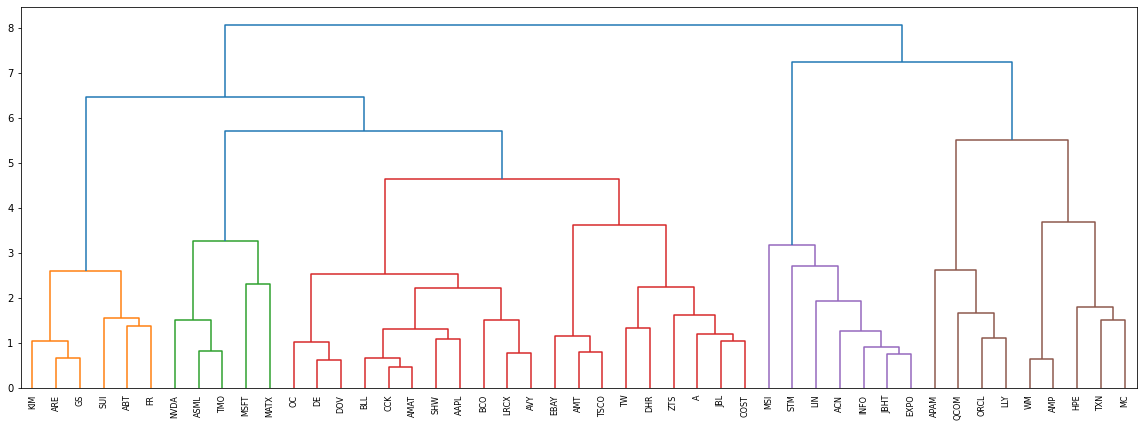

In [132]:

fig, ax=plt.subplots(figsize=(20,7))
dendrogram = sch.dendrogram(sch.linkage(Y, method = 'ward'), ax=ax, labels=Y.index)
# plt.title('Dendrogram') 
# plt.xlabel('Company')
# plt.ylabel('Euclidean distances')
# plt.show()

In [166]:
hc = AgglomerativeClustering(n_clusters =6, linkage ='ward')
hc

AgglomerativeClustering(n_clusters=6)

In [167]:
hc.fit(Y)

AgglomerativeClustering(n_clusters=6)

In [168]:
hc.labels_

array([1, 5, 5, 5, 2, 5, 5, 1, 4, 5, 4, 0, 2, 5, 1, 0, 0, 1, 2, 4, 0, 0,
       0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 3, 3, 0, 3, 3, 0, 2, 0, 3, 0, 0, 3,
       0, 0, 2], dtype=int64)

In [169]:
x['clusters'] = hc.labels_
x[x['clusters'] == 0], x[x['clusters'] == 1],x[x['clusters'] == 2],x[x['clusters'] == 3],x[x['clusters'] == 4],x[x['clusters'] == 5]

(   Symbol ESG Score  3-Yr EPS Growth Rate  ROE  Div Yld  clusters
 11    SHW     70.45                    17   58      0.7         0
 15    CCK     68.66                    11   41      0.7         0
 16     DE     68.58                    14   23      1.1         0
 20    BLL     67.05                    15   32      0.8         0
 21     TW     66.90                    21    8      0.4         0
 22   AMAT     66.89                    12   41      0.7         0
 23    DOV     66.65                    11   26      1.1         0
 25    JBL     66.52                    19   24      0.5         0
 26   LRCX     66.47                    12   71      1.0         0
 28   AAPL     66.15                    17   74      0.6         0
 29     OC     65.36                    11   13      1.1         0
 30    BCO     65.34                     6  119      1.0         0
 31    AVY     64.98                    12   44      1.2         0
 34   COST     63.52                    20   26      0.7      

In [175]:
x

,Symbol,ESG Score,3-Yr EPS Growth Rate,ROE,Div Yld,clusters
0,MSFT,76.30,25,47,0.7,1
1,LIN,76.00,16,9,1.3,5
2,ACN,75.95,9,33,1.0,5
3,JBHT,74.14,6,21,0.7,5
4,TXN,73.14,6,58,2.1,2
5,INFO,72.60,11,13,0.7,5
6,STM,72.37,1,14,0.3,5
7,NVDA,72.19,27,43,0.1,1
8,ORCL,71.14,14,163,1.4,4
9,MSI,70.81,9,0,1.2,5


In [188]:
symbol_list = []
sector_list = []

for symbol, n in x.set_index('Symbol').iterrows():
    if(n['clusters'] == 5 or n['clusters'] == 4 or n['clusters'] == 2 ):
        symbol_list.append(symbol)

    
for i in symbol_list:
    ticker = yf.Ticker(i)
    sector_list.append(ticker.info['sector'])
    

In [189]:
comp_dict = {
    'Company' : symbol_list,
    'Sector' : sector_list
}
company_sec = pd.DataFrame.from_dict(comp_dict)

In [190]:
company_sec.nunique()

Company    16
Sector      5
dtype: int64

In [191]:
company_sec['Sector'].value_counts()

Technology            7
Industrials           4
Financial Services    3
Healthcare            1
Basic Materials       1
Name: Sector, dtype: int64